In [1]:
import os
import glob
import imageio
import scipy.io
from scipy import ndimage
from skimage import feature
from skimage import exposure
from skimage import morphology
from skimage.color import rgb2gray, gray2rgb
from skimage.filters import gaussian
from skimage.filters.rank import median
from skimage.morphology import disk, ball
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
%matplotlib notebook


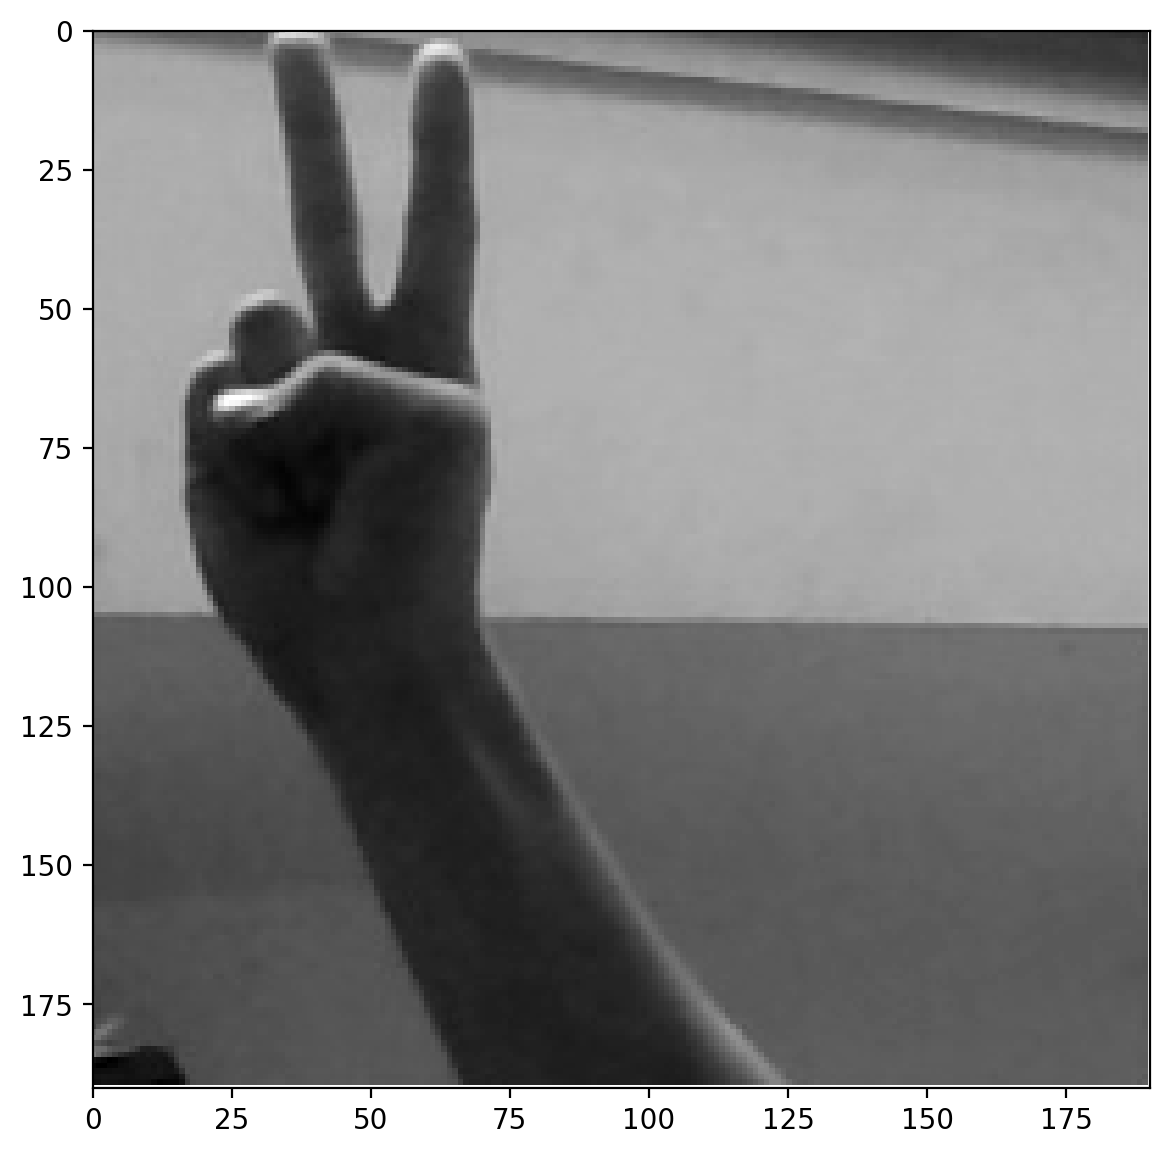

In [20]:
framesdir = "../image-classification-tensorflow-master/dataset_og/V/"
fnames = glob.glob(framesdir + "*.jpg")
fnames = [os.path.basename(name) for name in fnames]

random_indeces = np.random.choice(len(fnames), 1, replace=False)
chosen_fnames = np.take(fnames, random_indeces)
    
# original image
original_image = imageio.imread(framesdir + chosen_fnames[0])

# crop original image 5px from each side to remove border
height, width, channels = original_image.shape
original_image = original_image[5:width-5,5:height-5,:]

# grayscale image
gray_img = rgb2gray(original_image)


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_img, cmap=plt.cm.gray)
ax.axis([0, gray_img.shape[1], gray_img.shape[0], 0])

plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  if sys.path[0] == '':


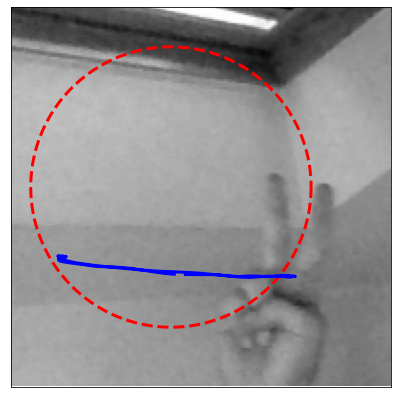

In [3]:
#Active Contours




s = np.linspace(0, 2*np.pi, 200)
r = 90 + 70*np.sin(s)
c = 80 + 70*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(gray_img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001, w_line=-6)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_img.shape[1], gray_img.shape[0], 0])

plt.show()


In [4]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


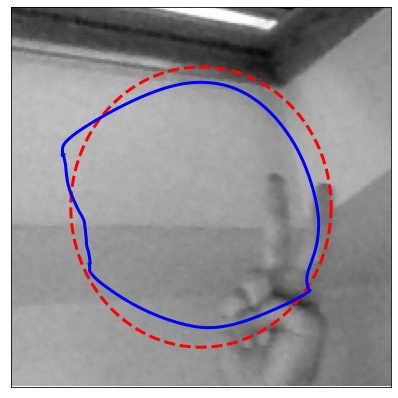

In [5]:
# Active Contours Pt.2
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 70*np.sin(s)
c = 95 + 65*np.cos(s)
init = np.array([r, c]).T

# snake = active_contour(gaussian(original_image, 3), init, alpha=0.015, beta=10, gamma=0.001)
snake = active_contour(gray_img, init, alpha = 0.015, beta = 10)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_img.shape[1], gray_img.shape[0], 0])

plt.show()



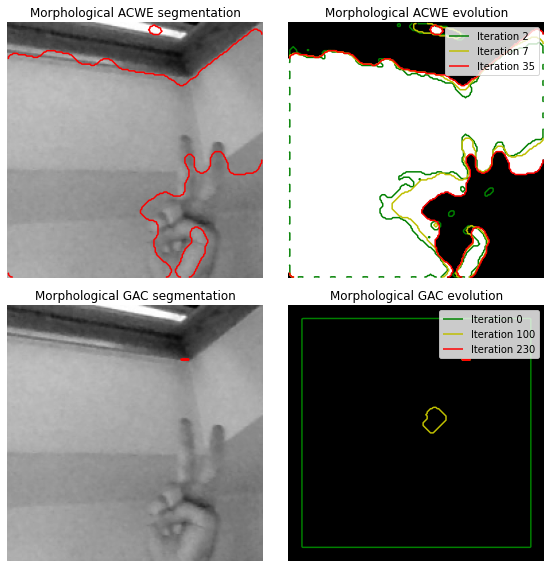

In [6]:
# Morphological Snakes

from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Initial level set
init_ls = checkerboard_level_set(gray_img.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(gray_img, 35, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(gray_img, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = img_as_float(gray_img)
gimage = inverse_gaussian_gradient(gray_img)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 230, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

In [21]:
import cv2

In [22]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

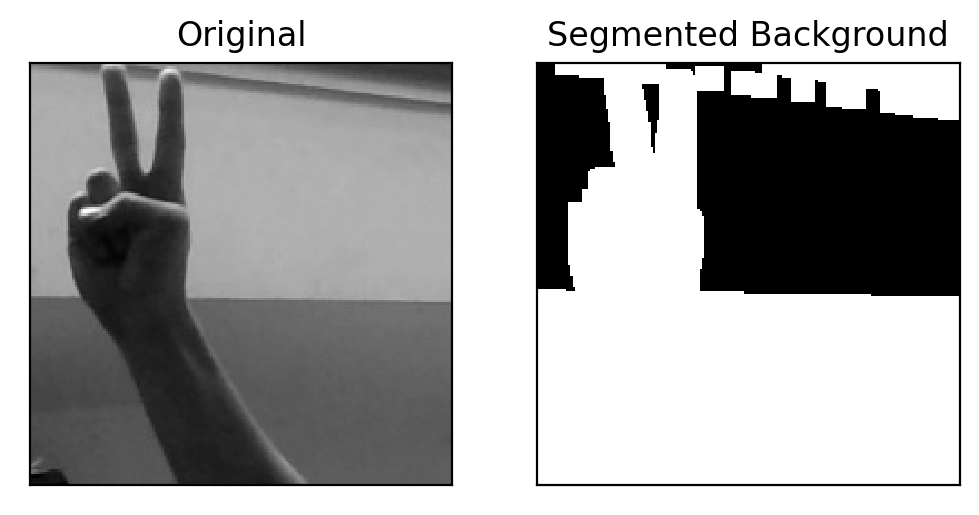

In [23]:
gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(gray_img, sure_bg, 'Original', 'Segmented Background')


In [24]:
# Pipeline 3 Attempt

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.filters import threshold_minimum
from skimage.filters import threshold_mean
from skimage.filters import threshold_otsu
from skimage import filters

(<Figure size 2800x2800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe22487eb38>)

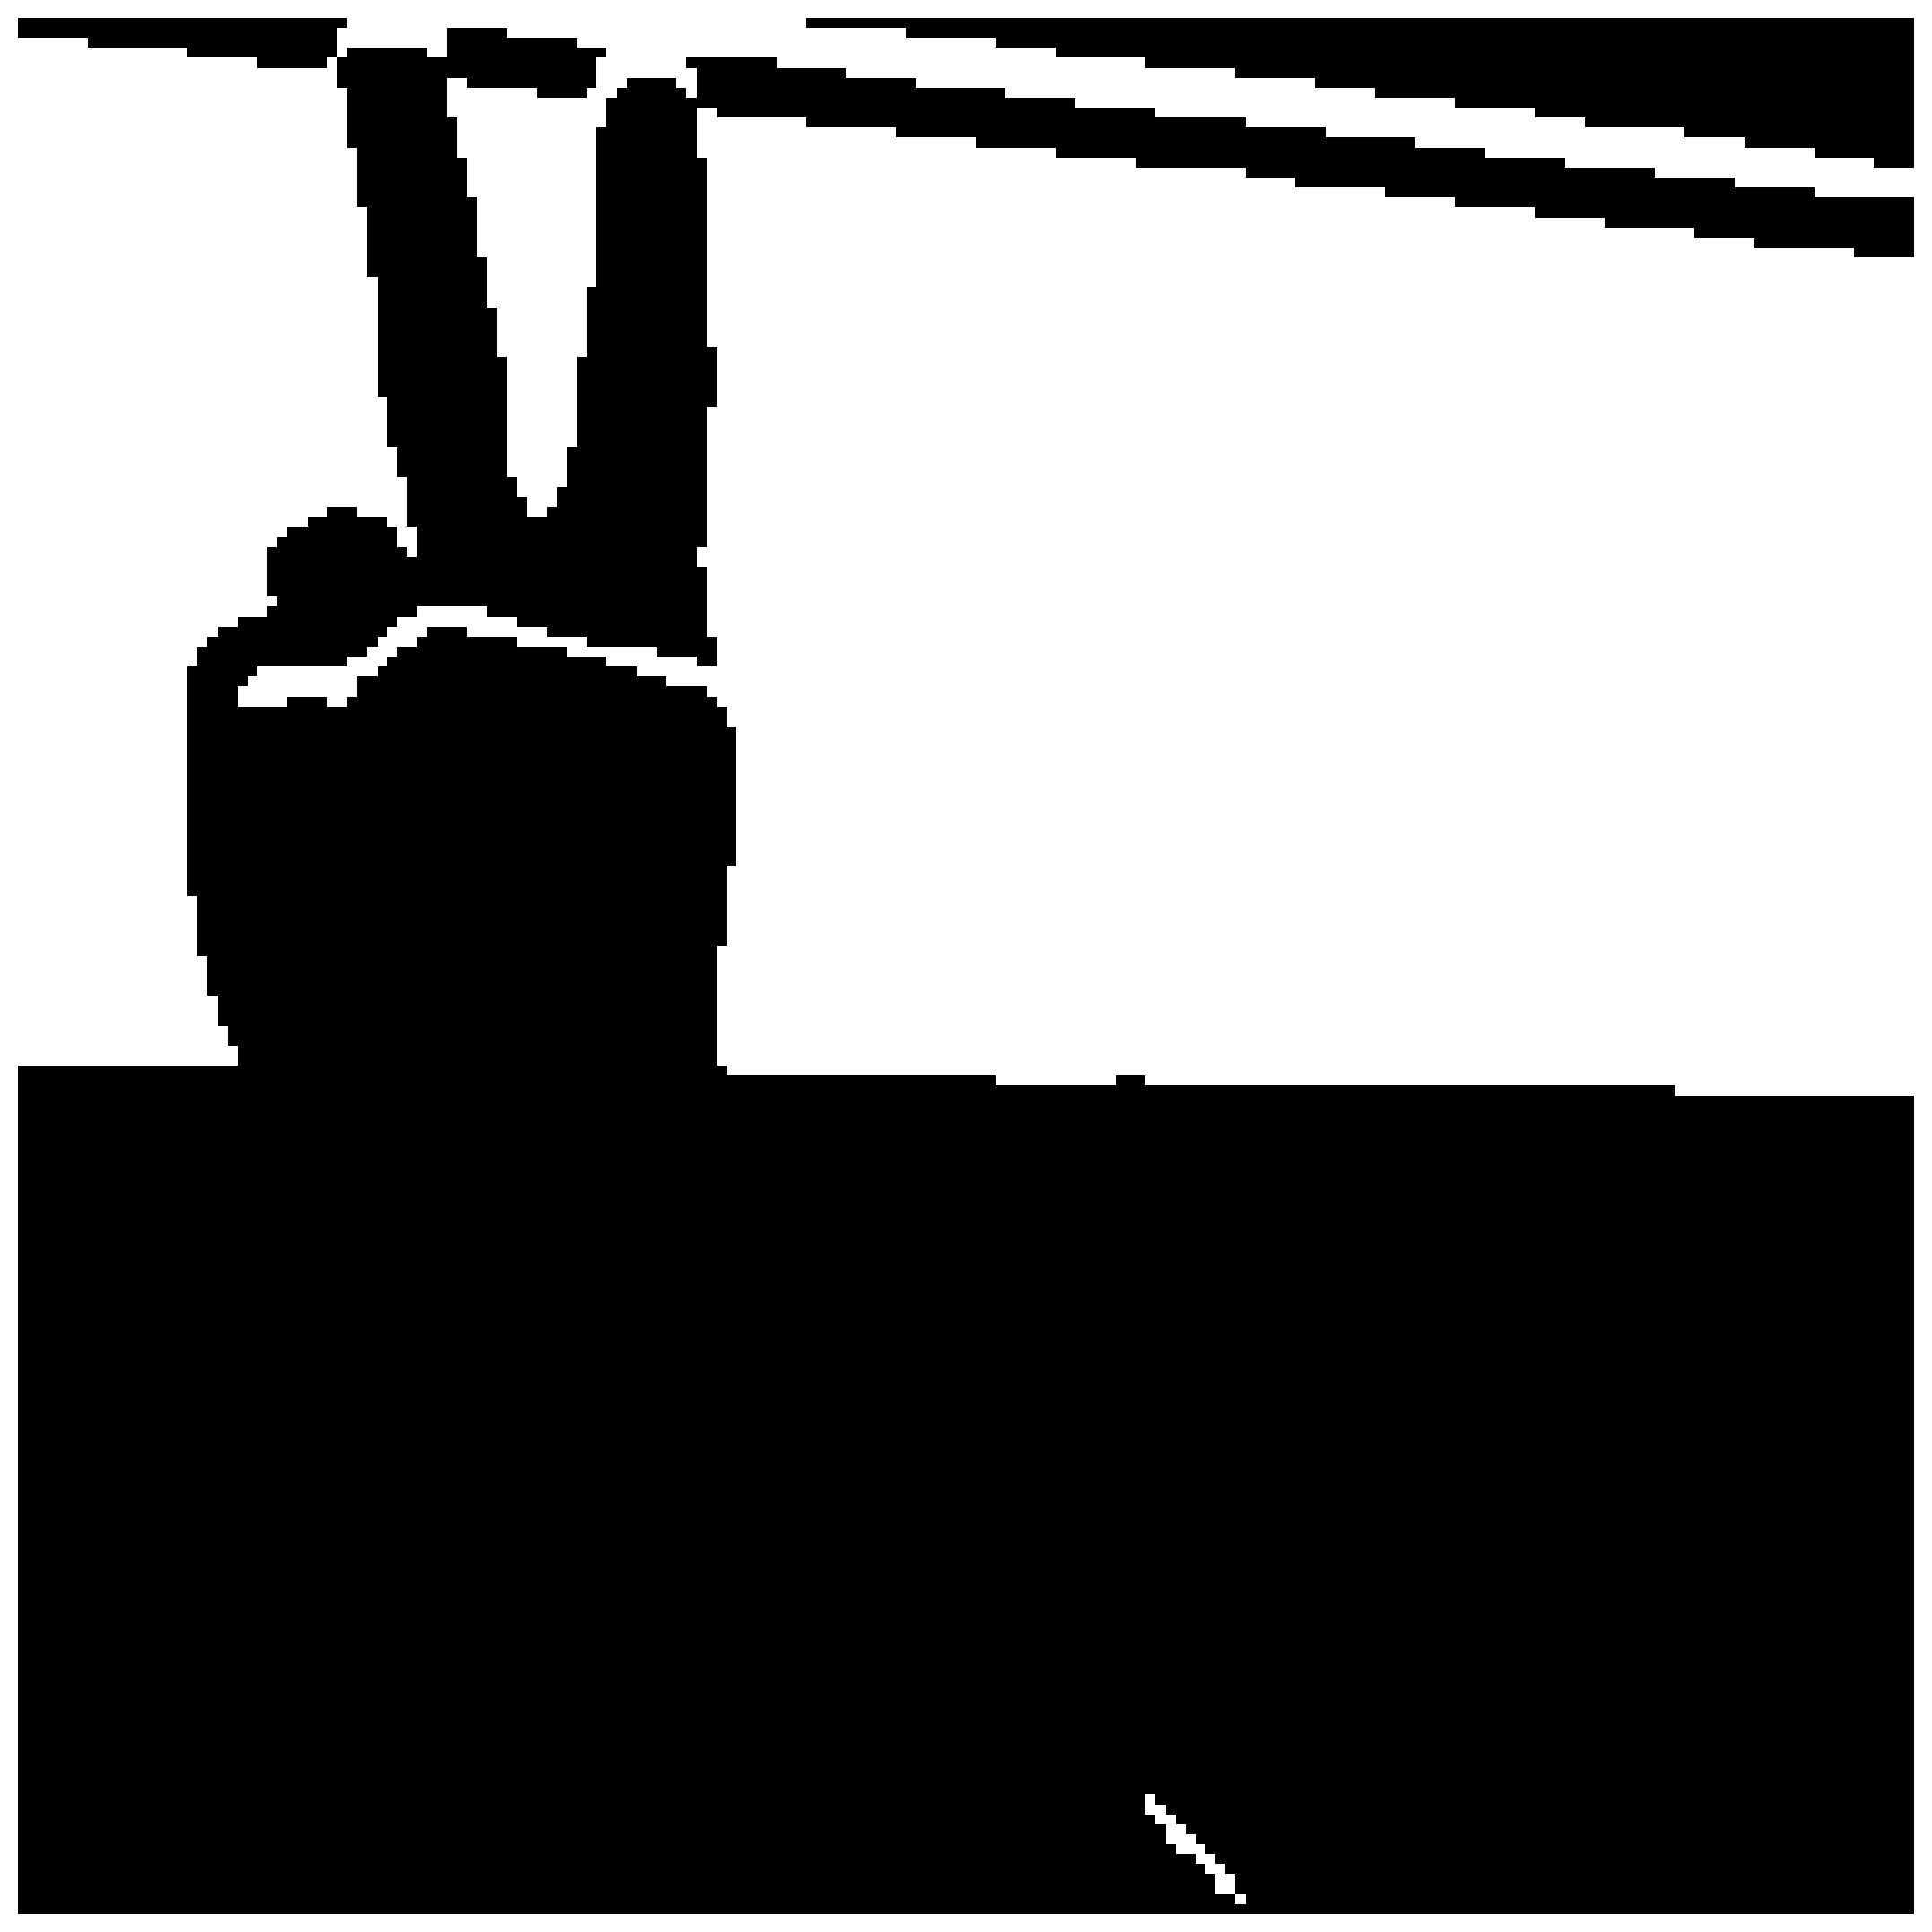

In [26]:
thresh_min = threshold_minimum(gray_img)
binary_min = gray_img > thresh_min

image_show(binary_min)

In [27]:
thresh = threshold_mean(image)
binary = image > thresh


image_show(binary)

(<Figure size 2800x2800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe2126719b0>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe226f2d378> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 2800x2800 with 1 Axes>

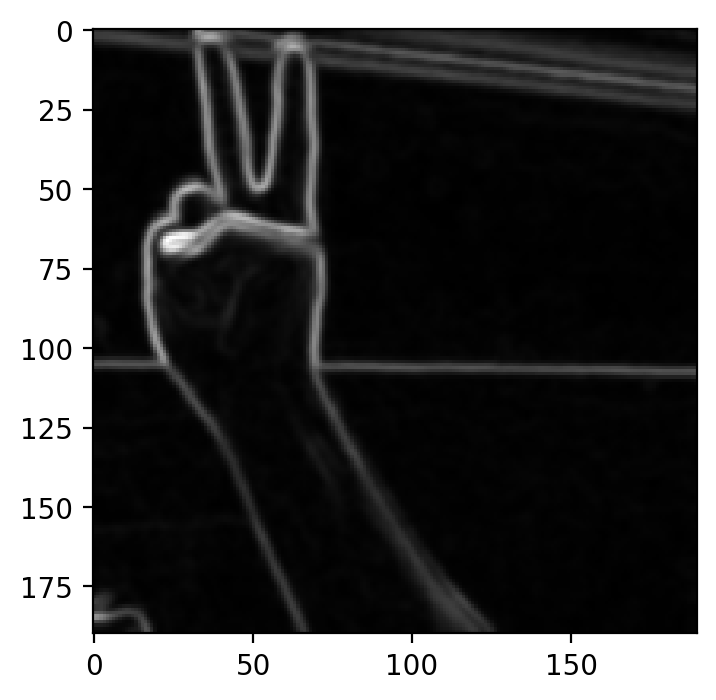

In [28]:

sobel = filters.sobel(gray_img)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200
blurred = filters.gaussian(sobel, sigma=1.0)
plt.imshow(blurred)

(<Figure size 2800x2800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe2124c74e0>)

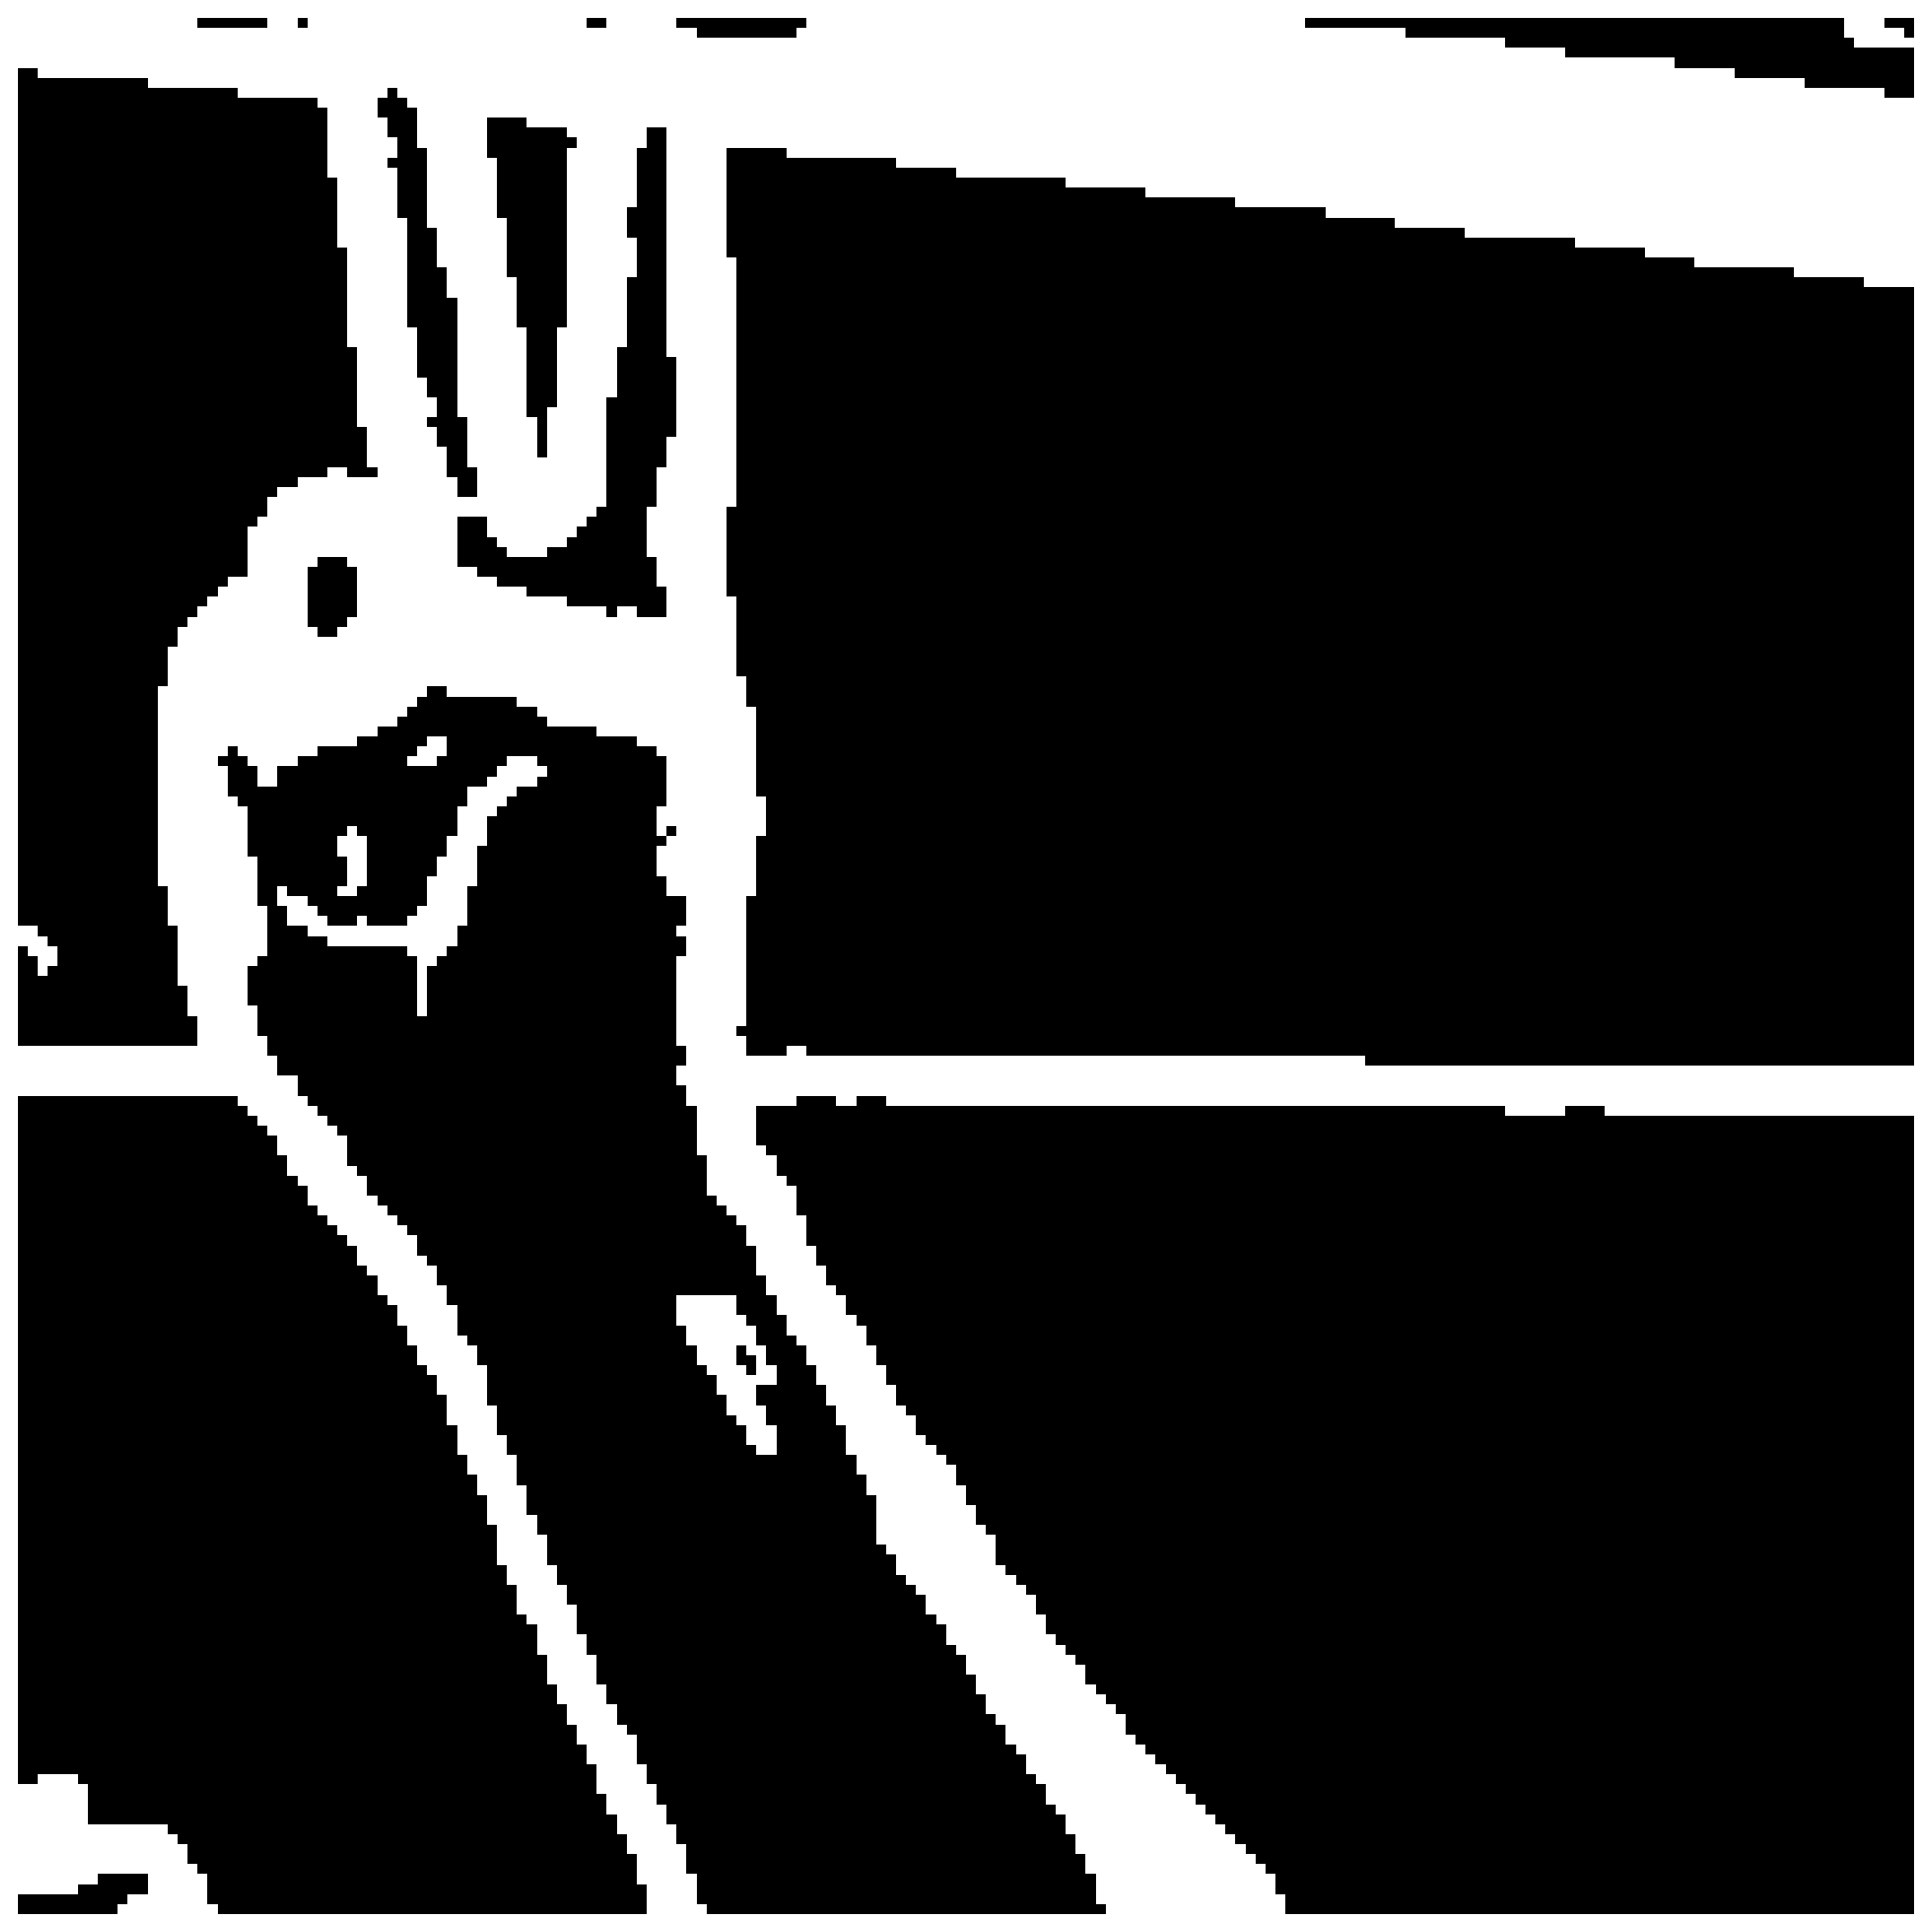

In [29]:
thresh = threshold_mean(blurred)
binary = blurred >= thresh


image_show(binary)

(<Figure size 2800x2800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe21245e898>)

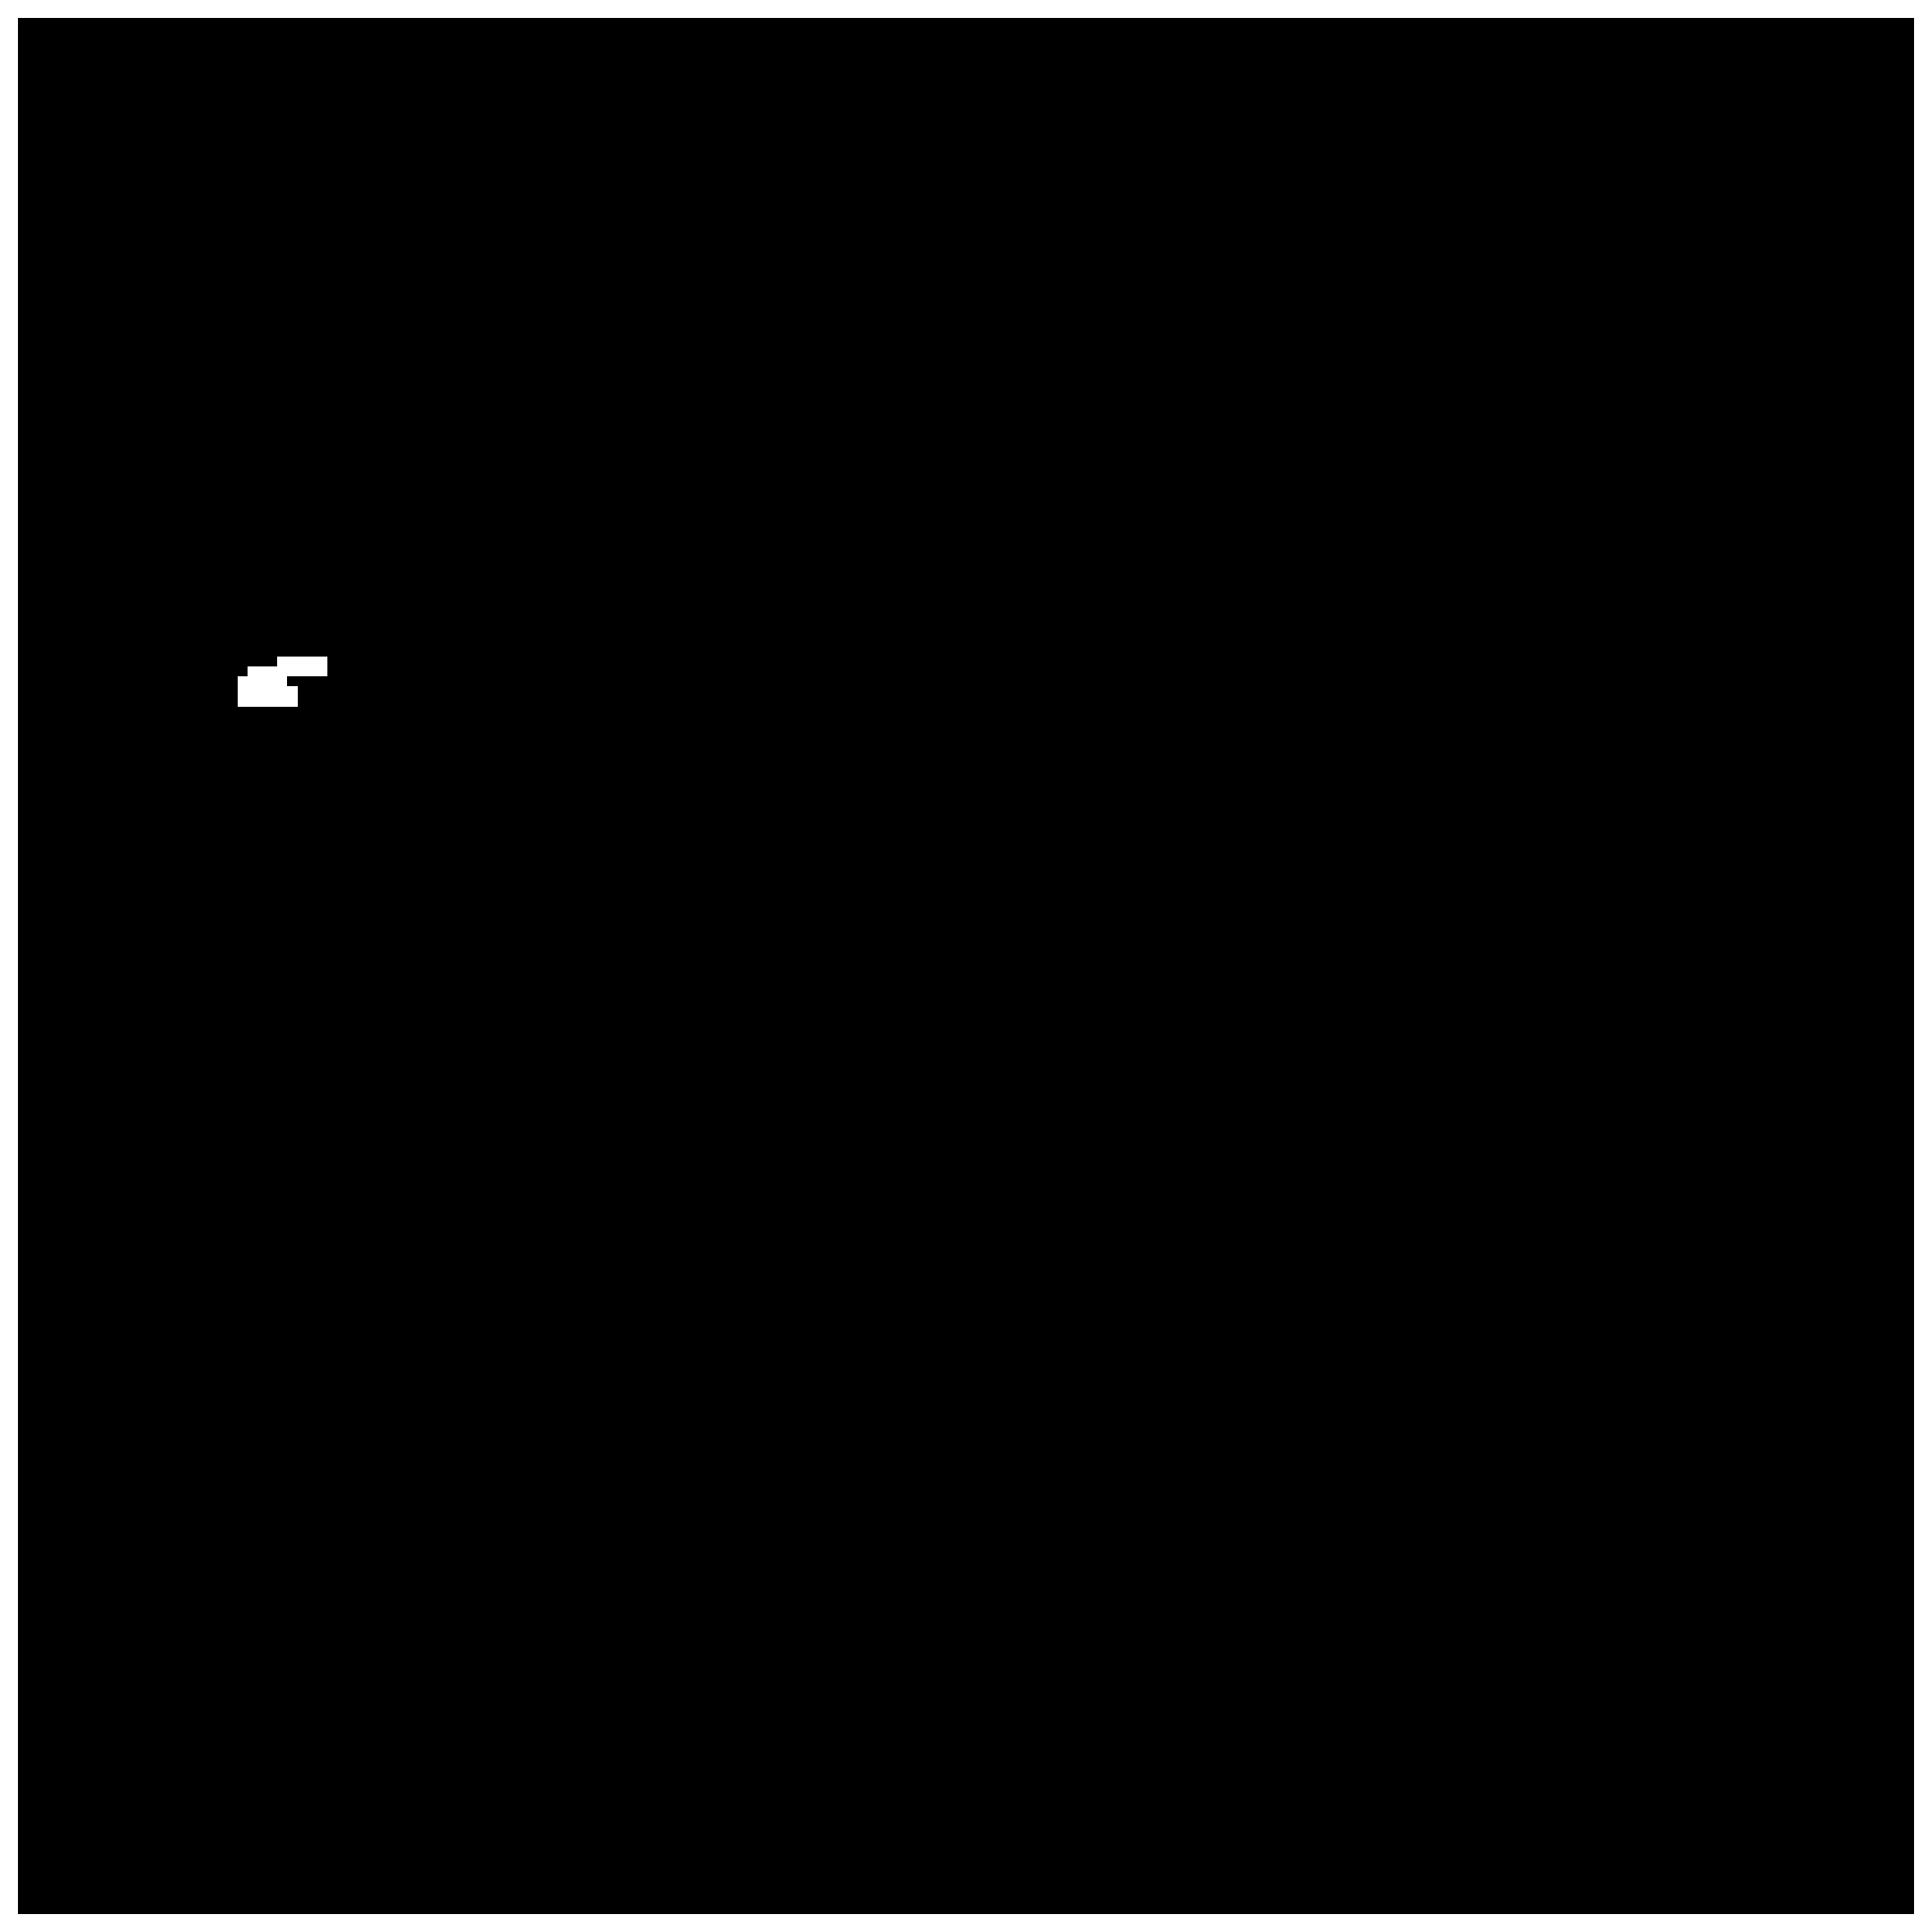

In [30]:
thresh_min = threshold_minimum(blurred)
binary_min = blurred >= thresh_min

image_show(binary_min)

(<Figure size 2800x2800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe2123a17f0>)

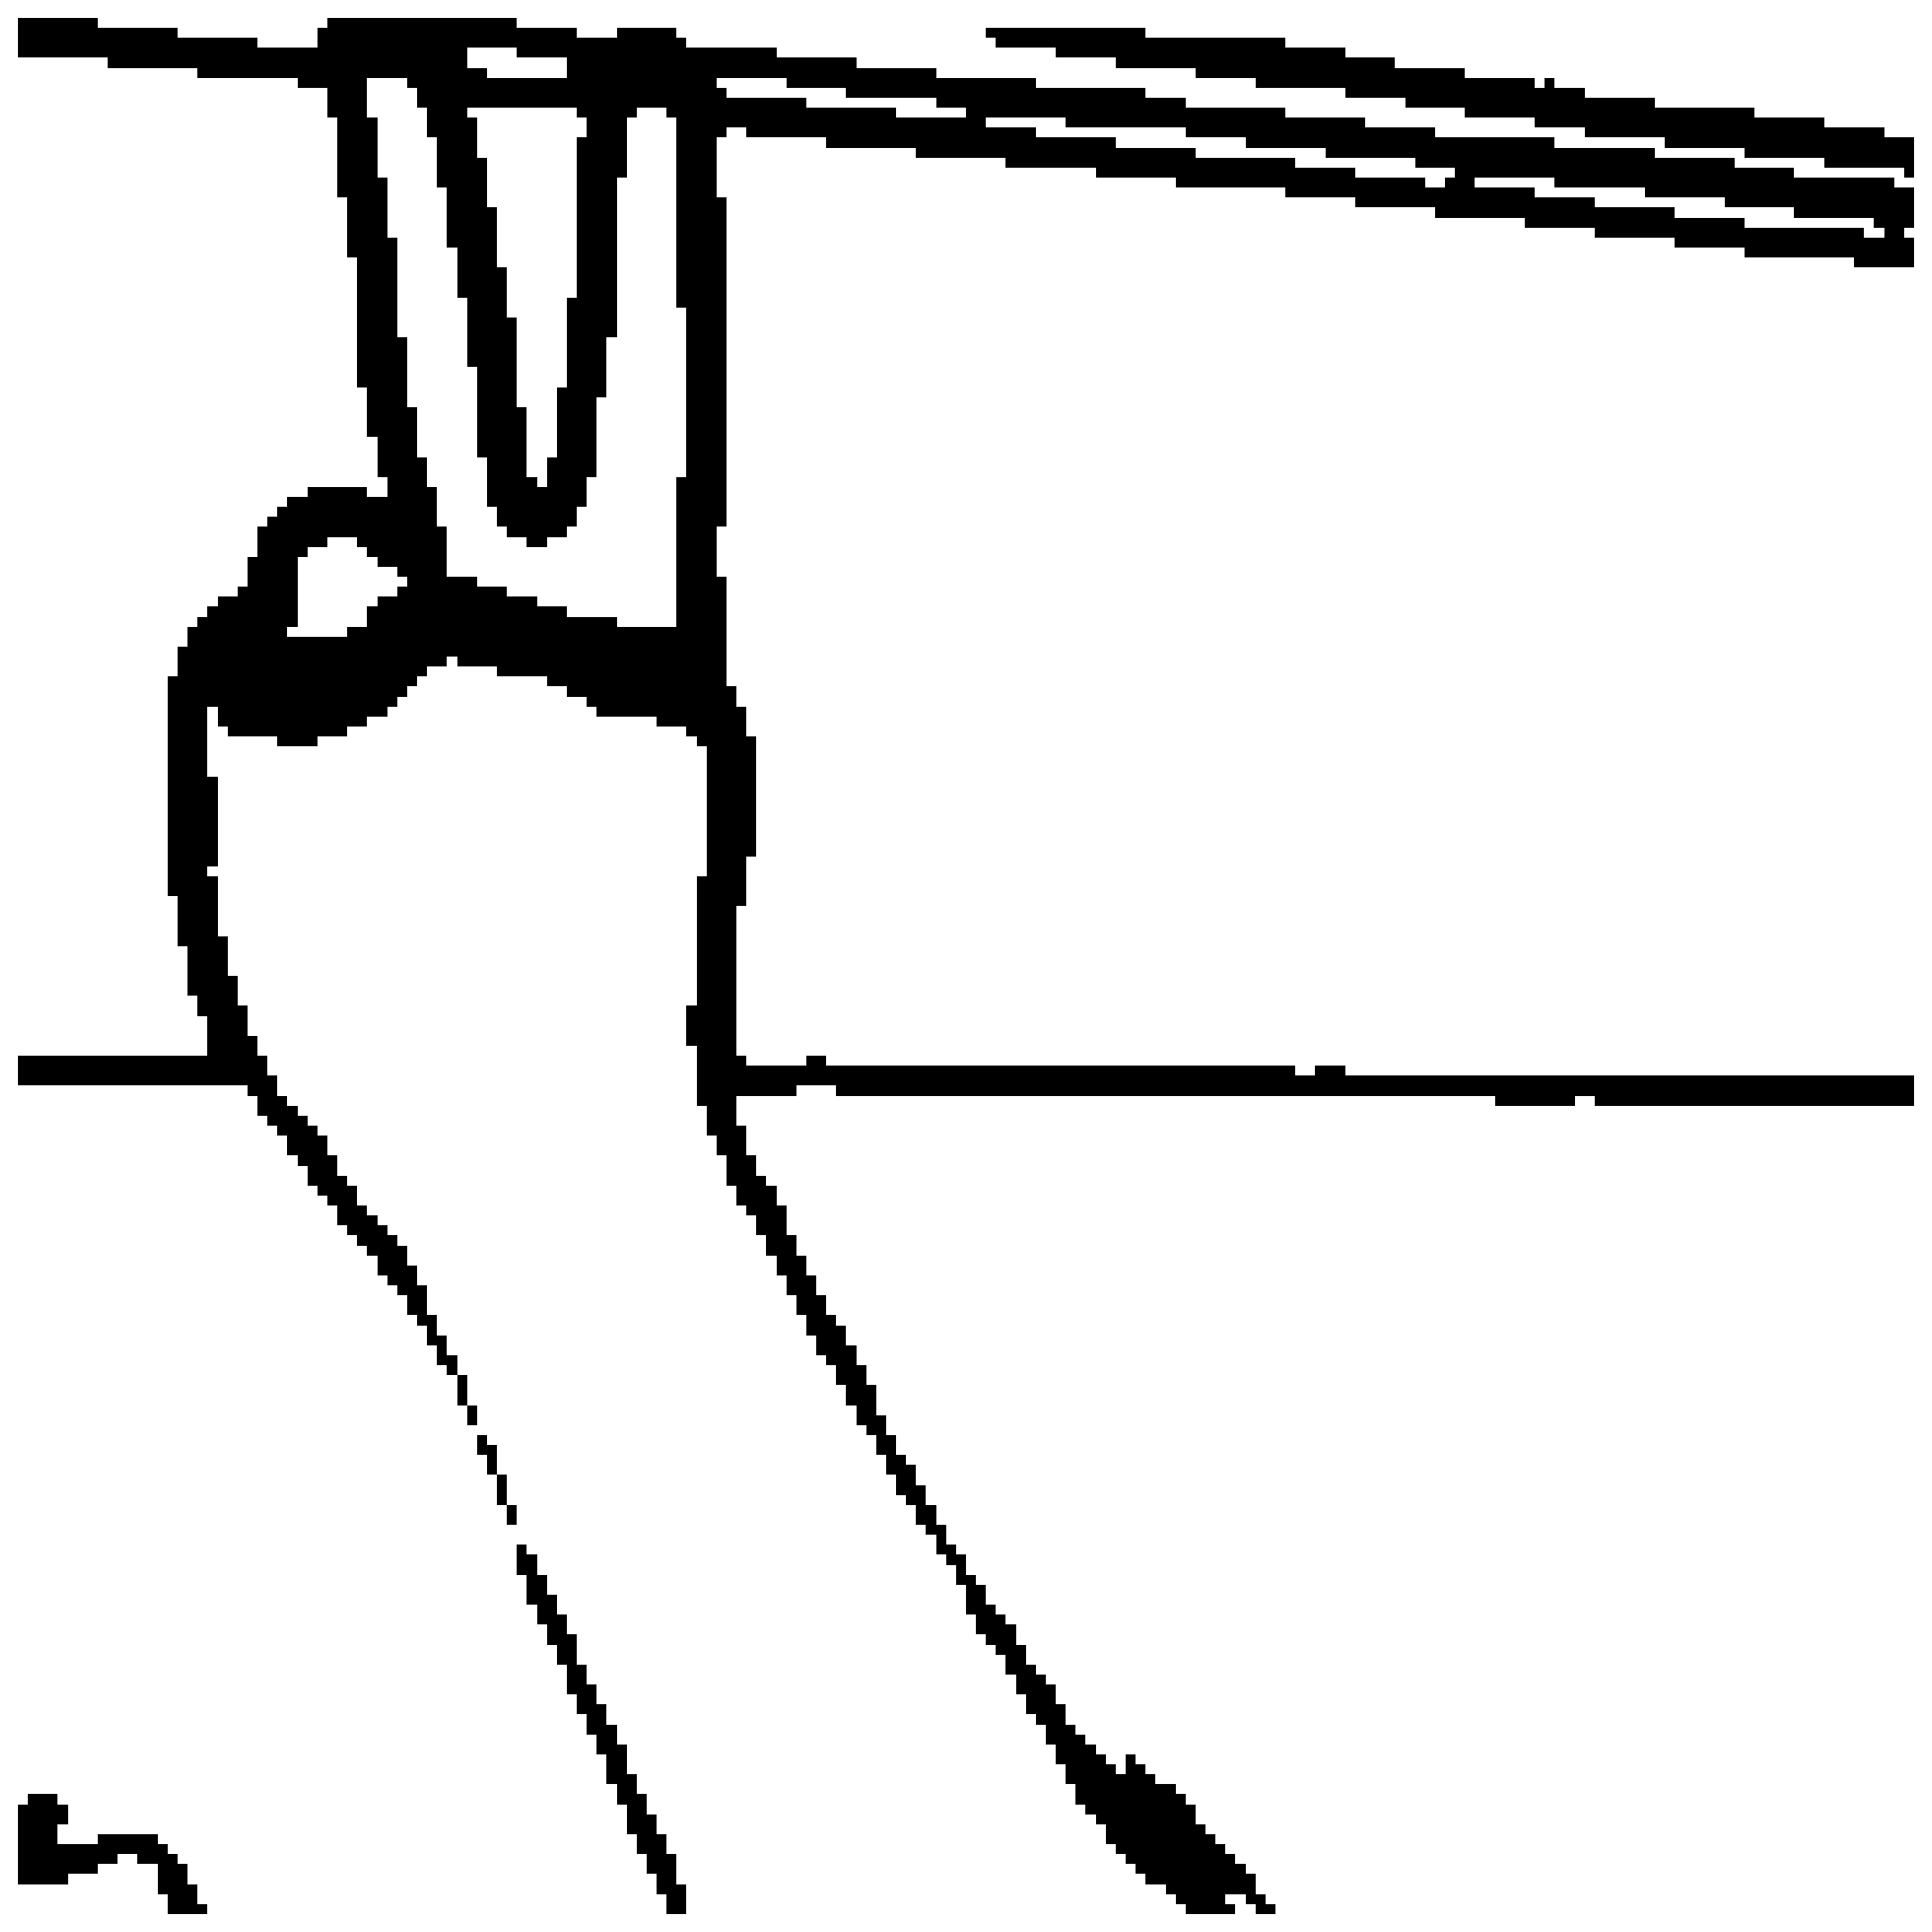

In [31]:
thresh = threshold_otsu(blurred)
binary = blurred <= thresh 
image_show(binary)

In [32]:
#hough transform
#Crop to main circle
# try snake again
# Or filter and threshold

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81]
[ 97  97  97  97 177 177  17  17  98  98  96  96 177 177  17  17  99  99
  95  95 177 177  17  17 100 100  94  94 177 177  17  17 101 101  93  93
 177 177  17  17 102 102  92  92 177 177  17  17 103 103  91  91 177 177
  17  17 104 104  90  90 177 177  17  17 105 105  89  89 177 177  17  17
 106 106  88  88 176 176  18  18 107 107  87  87 176 176  18  18 108 108
  86  86 176 176  18  18 109 109  85  85 176 176  18  18 110 110  84  84
 176 176  18  18 111 111  83  83 176 176  18  18 112 112  82  82 176 176
  18  18 113 113  81  81 175 175  19  19 114 114  80  80 175 175  19  19
 115 115  79  79 175 175  19  19 116 116  78  78 175 175  19  19 117 117
  77  77 174 174  20  20 118 118  76  76 174 174  20  20 119 119  75  75
 174 174  20  20 120 120  74  74 174 174  20  20 121 121  73  73 173 173
  21  21 122 122  72  72 173 173  21  21 123 123  71  71 173 173  21  21
 124 124  70  70 172 172  22  22 125 125  69  69 172 172  22  22 126 126
  68  68 172 172  22  22 127 127  67  67 171 1

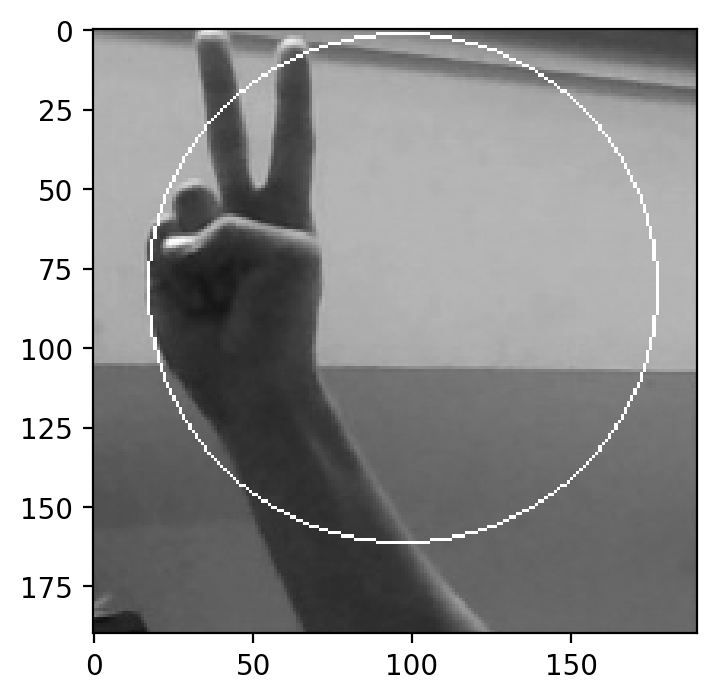

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = gray_img
edges = canny(image, sigma=.1)


# Detect two radii
# hough_radii = np.arange(20, 35, 2)
hough_radii = np.arange(80, 120, 2)

hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)

print(cy)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    print(circx)
    print(radius)
#     circy, circx = circle_perimeter(75, 75, 10,
#                                     shape=image.shape)
    
    image[circy, circx] = (300, 220, 220)
    
    

ax.imshow(image, cmap=plt.cm.gray)
plt.show()